<a href="https://colab.research.google.com/github/Nilesh7889/Deep-Learning-for-Medical-Image-Segmentation/blob/master/computervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/cs631')

# !ln -s "/gdrive/My Drive/CV631" "/content/cs631"


In [0]:
import data
data.load_train_data()

(array([[[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],
 
        ...,
 
        [[  0,   0,   2, ...,   0,   0,   0],
         [  0,   0,   1, ...,   0,   0,   0],
         [  0,

In [0]:
from __future__ import print_function

import os
import numpy as np

from skimage.io import imsave, imread

# path to images dataset. Recommended to write down entire path to avoid errors (i.e "C:/User/Desktop.../raw/)
data_path = 'raw/'

image_rows = 384
image_cols = 384


def create_train_data():
    train_data_path = os.path.join(data_path, 'train')
    images = os.listdir(train_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating training images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.png'
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img_mask = imread(os.path.join(train_data_path, image_mask_name), as_grey=True)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask

        if i % 100 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_train.npy', imgs)
    np.save('imgs_mask_train.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_train_data():
    imgs_train = np.load('imgs_train.npy')
    imgs_mask_train = np.load('imgs_mask_train.npy')
    return imgs_train, imgs_mask_train


def create_validate_data():
    validate_data_path = os.path.join(data_path, 'validate')
    images = os.listdir(validate_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating validation images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.png'
        img_val_id = int(image_name.split('.')[0])
        img = imread(os.path.join(validate_data_path, image_name), as_grey=True)
        img_mask = imread(os.path.join(validate_data_path, image_mask_name), as_grey=True)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask

        if i % 10 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_validate.npy', imgs)
    np.save('imgs_mask_validate.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_validate_data():
    imgs_validate = np.load('imgs_validate.npy')
    imgs_mask_validate = np.load('imgs_mask_validate.npy')
    return imgs_validate, imgs_mask_validate


def create_test_data():
    test_data_path = os.path.join(data_path, 'test')
    images = os.listdir(test_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_id = np.ndarray((total, ), dtype=np.int64)

    i = 0
    print('-'*30)
    print('Creating testing images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.png'
        img_id = int(image_name.split('.')[0])
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img_mask = imread(os.path.join(test_data_path, image_mask_name), as_grey=True)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask
        imgs_id[i] = img_id

        if i % 10 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_test.npy', imgs)
    np.save('imgs_mask_test.npy', imgs_mask)
    np.save('imgs_id_test.npy', imgs_id)
    print('Saving to .npy files done.')


def load_test_data():
    imgs_test = np.load('imgs_test.npy')
    imgs_mask_test = np.load('imgs_mask_test.npy')
    imgs_id = np.load('imgs_id_test.npy')
    return imgs_test, imgs_id, imgs_mask_test

if __name__ == '__main__':
    create_train_data()
    create_validate_data()
    create_test_data()

------------------------------
Creating training images...
------------------------------
Done: 0/2583 images


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


Done: 100/2583 images
Done: 200/2583 images
Done: 300/2583 images
Done: 400/2583 images
Done: 500/2583 images
Done: 600/2583 images
Done: 700/2583 images
Done: 800/2583 images
Done: 900/2583 images
Done: 1000/2583 images
Done: 1100/2583 images
Done: 1200/2583 images
Done: 1300/2583 images
Done: 1400/2583 images
Done: 1500/2583 images
Done: 1600/2583 images
Done: 1700/2583 images
Done: 1800/2583 images
Done: 1900/2583 images
Done: 2000/2583 images
Done: 2100/2583 images
Done: 2200/2583 images
Done: 2300/2583 images
Done: 2400/2583 images
Done: 2500/2583 images
Loading done.
Saving to .npy files done.
------------------------------
Creating validation images...
------------------------------
Done: 0/1127 images
Done: 10/1127 images
Done: 20/1127 images
Done: 30/1127 images
Done: 40/1127 images
Done: 50/1127 images
Done: 60/1127 images
Done: 70/1127 images
Done: 80/1127 images
Done: 90/1127 images
Done: 100/1127 images
Done: 110/1127 images
Done: 120/1127 images
Done: 130/1127 images
Done

Using TensorFlow backend.


------------------------------
Loading and preprocessing train data...
------------------------------


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


------------------------------
Loading and preprocessing validation data...
------------------------------
------------------------------
Loading and preprocessing test data...
------------------------------
------------------------------
Creating and compiling model...
------------------------------
Instructions for updating:
Colocations handled automatically by placer.
------------------------------
Fitting model...
------------------------------
Train on 2583 samples, validate on 1127 samples
Epoch 1/100
2583/2583 [==============================] - 415s 161ms/step - loss: -0.1351 - similarity: 0.0736 - dice_coef: 0.1351 - val_loss: -0.1475 - val_similarity: 0.0809 - val_dice_coef: 0.1475
Epoch 2/100
2583/2583 [==============================] - 385s 149ms/step - loss: -0.4140 - similarity: 0.2837 - dice_coef: 0.4140 - val_loss: -0.5904 - val_similarity: 0.4450 - val_dice_coef: 0.5904
Epoch 3/100
2583/2583 [==============================] - 384s 149ms/step - loss: -0.6563 - similarity

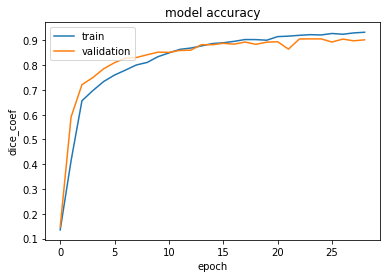

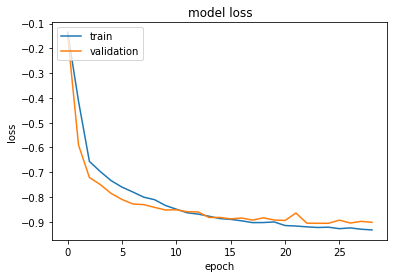

------------------------------
Loading saved weights...
------------------------------
------------------------------
Predicting masks on test data...
------------------------------
1081/1081 [==============================] - 42s 39ms/step
------------------------------
Saving predicted masks to files...
------------------------------


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/994322733_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/9943227139_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/9943227138_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/9943227137_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/994322735_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/994322734_pred.png is a low contrast image
  warn('%s is a low contrast

In [0]:
from __future__ import print_function

import os
import tensorflow as tf
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

from data import load_train_data, load_test_data, load_validate_data

K.clear_session()
K.set_image_data_format('channels_last')  # TF dimension ordering in this code


img_rows = 384
img_cols = 384

smooth = 1e-5


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def similarity(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(K.abs(y_true_f * y_pred_f))
    return ((intersection) / (K.sum(K.abs(y_true_f)+ K.abs(y_pred_f)) - intersection))



def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5), conv4])
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6), conv3])
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7), conv2])
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8), conv1])
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    # model.load_weights('weights.h5')

    model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss, metrics=[similarity, dice_coef])

    return model


def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i] = resize(imgs[i], (img_cols, img_rows), preserve_range=True)

    imgs_p = imgs_p[..., np.newaxis]
    return imgs_p


def train_and_predict():
    print('-'*30)
    print('Loading and preprocessing train data...')
    print('-'*30)
    imgs_train, imgs_mask_train = load_train_data()

    imgs_train = preprocess(imgs_train)
    imgs_mask_train = preprocess(imgs_mask_train)

    imgs_train = imgs_train.astype('float32')
    mean = np.mean(imgs_train)  # mean for data centering
    std = np.std(imgs_train)  # std for data normalization

    imgs_train -= mean
    imgs_train /= std

    imgs_mask_train = imgs_mask_train.astype('float32')
    imgs_mask_train /= 255.  # scale masks to [0, 1]

    print('-' * 30)
    print('Loading and preprocessing validation data...')
    print('-' * 30)
    imgs_validate, imgs_mask_validate = load_validate_data()

    imgs_validate = preprocess(imgs_validate)
    imgs_mask_validate = preprocess(imgs_mask_validate)

    imgs_validate = imgs_validate.astype('float32')
    imgs_validate -= mean
    imgs_validate /= std

    imgs_mask_validate = imgs_mask_validate.astype('float32')
    imgs_mask_validate /= 255.  # scale masks to [0, 1]

    print('-'*30)
    print('Loading and preprocessing test data...')
    print('-'*30)
    imgs_test, imgs_id_test, imgs_mask_test = load_test_data()

    imgs_test = preprocess(imgs_test)
    imgs_mask_test = preprocess(imgs_mask_test)

    imgs_test = imgs_test.astype('float32')
    imgs_test -= mean
    imgs_test /= std

    imgs_mask_test = imgs_mask_test.astype('float32')
    imgs_mask_test /= 255.  # scale masks to [0, 1]


    print('-'*30)
    print('Creating and compiling model...')
    print('-'*30)
    model = get_unet()
    callbacks = [tf.keras.callbacks.ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True),
                 tf.keras.callbacks.EarlyStopping(monitor='val_dice_coef', patience=5, min_delta=0, mode='max'),
                 tf.keras.callbacks.CSVLogger('model_1_logs.csv')]

    print('-'*30)
    print('Fitting model...')
    print('-'*30)

    # Fitting model; increment epochs appropriately (default epochs=300, default batch_size=8)
    history = model.fit(imgs_train, imgs_mask_train, batch_size=8, epochs=100, verbose=1, shuffle=False,
              validation_data=(imgs_validate, imgs_mask_validate),
              callbacks=callbacks)


    # evaluate the model
    print('-' * 30)
    print('Evaluating the model on test data...')
    print('-' * 30)

    score = model.evaluate(imgs_test, imgs_mask_test)
    print('\nloss: ', score[0])
    print('dice_coef: ', score[2])
    print('similarity: ', score[1], '\n')


    # list all data in history
    print(history.history.keys())

    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    plt.title('model accuracy')
    plt.ylabel('dice_coef')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    print('-'*30)
    print('Loading saved weights...')
    print('-'*30)
    # model.load_weights('weights.h5')

    print('-'*30)
    print('Predicting masks on test data...')
    print('-'*30)
    imgs_mask_test_pred = model.predict(imgs_test, verbose=1)

    # np.save('imgs_mask_test.npy', imgs_mask_test_pred)

    print('-' * 30)
    print('Saving predicted masks to files...')
    print('-' * 30)
    pred_dir = 'preds'
    if not os.path.exists(pred_dir):
        os.mkdir(pred_dir)
    for image, image_id in zip(imgs_mask_test_pred, imgs_id_test):
        image = (image[:, :, 0] * 255.).astype(np.uint8)
        imsave(os.path.join(pred_dir, str(image_id) + '_pred.png'), image)


if __name__ == '__main__':
    train_and_predict()


In [0]:
import data
data.create_test_data()

------------------------------
Creating testing images...
------------------------------


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


Done: 0/228 images
Done: 10/228 images
Done: 20/228 images
Done: 30/228 images
Done: 40/228 images
Done: 50/228 images
Done: 60/228 images
Done: 70/228 images
Done: 80/228 images
Done: 90/228 images
Done: 100/228 images
Done: 110/228 images
Done: 120/228 images
Done: 130/228 images
Done: 140/228 images
Done: 150/228 images
Done: 160/228 images
Done: 170/228 images
Done: 180/228 images
Done: 190/228 images
Done: 200/228 images
Done: 210/228 images
Done: 220/228 images
Loading done.
Saving to .npy files done.


Using TensorFlow backend.


------------------------------
Loading and preprocessing train data...
------------------------------


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


------------------------------
Loading and preprocessing validation data...
------------------------------
------------------------------
Loading and preprocessing test data...
------------------------------
------------------------------
Creating and compiling model...
------------------------------
Instructions for updating:
Colocations handled automatically by placer.
------------------------------
Fitting model...
------------------------------
Train on 673 samples, validate on 229 samples
Epoch 1/100
673/673 [==============================] - 117s 174ms/step - loss: -0.1219 - similarity: 0.0655 - dice_coef: 0.1219 - val_loss: -0.1277 - val_similarity: 0.0692 - val_dice_coef: 0.1277
Epoch 2/100
673/673 [==============================] - 94s 139ms/step - loss: -0.1243 - similarity: 0.0670 - dice_coef: 0.1243 - val_loss: -0.1337 - val_similarity: 0.0728 - val_dice_coef: 0.1337
Epoch 3/100
673/673 [==============================] - 95s 142ms/step - loss: -0.1397 - similarity: 0.0761 -

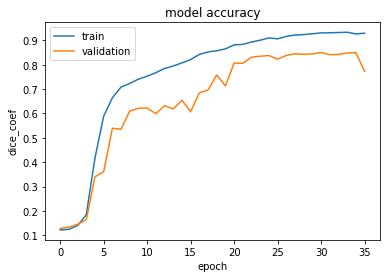

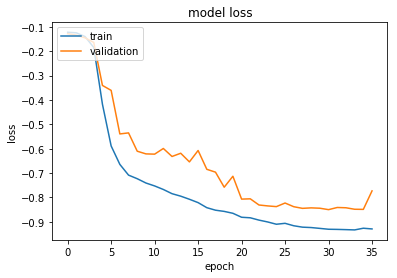

------------------------------
Loading saved weights...
------------------------------
------------------------------
Predicting masks on test data...
------------------------------
228/228 [==============================] - 9s 39ms/step
------------------------------
Saving predicted masks to files...
------------------------------


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/9811475143_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/9811475144_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/9811475145_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/9811475146_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/981147533_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/981147532_pred.png is a low contrast image
  warn('%s is a low contras

In [0]:
from __future__ import print_function

import os
import tensorflow as tf
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

from data import load_train_data, load_test_data, load_validate_data

K.clear_session()
K.set_image_data_format('channels_last')  # TF dimension ordering in this code


img_rows = 384
img_cols = 384

smooth = 1e-5


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def similarity(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(K.abs(y_true_f * y_pred_f))
    return ((intersection) / (K.sum(K.abs(y_true_f)+ K.abs(y_pred_f)) - intersection))



def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5), conv4])
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6), conv3])
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7), conv2])
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8), conv1])
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    # model.load_weights('weights.h5')

    model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss, metrics=[similarity, dice_coef])

    return model


def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i] = resize(imgs[i], (img_cols, img_rows), preserve_range=True)

    imgs_p = imgs_p[..., np.newaxis]
    return imgs_p


def train_and_predict():
    print('-'*30)
    print('Loading and preprocessing train data...')
    print('-'*30)
    imgs_train, imgs_mask_train = load_train_data()

    imgs_train = preprocess(imgs_train)
    imgs_mask_train = preprocess(imgs_mask_train)

    imgs_train = imgs_train.astype('float32')
    mean = np.mean(imgs_train)  # mean for data centering
    std = np.std(imgs_train)  # std for data normalization

    imgs_train -= mean
    imgs_train /= std

    imgs_mask_train = imgs_mask_train.astype('float32')
    imgs_mask_train /= 255.  # scale masks to [0, 1]

    print('-' * 30)
    print('Loading and preprocessing validation data...')
    print('-' * 30)
    imgs_validate, imgs_mask_validate = load_validate_data()

    imgs_validate = preprocess(imgs_validate)
    imgs_mask_validate = preprocess(imgs_mask_validate)

    imgs_validate = imgs_validate.astype('float32')
    imgs_validate -= mean
    imgs_validate /= std

    imgs_mask_validate = imgs_mask_validate.astype('float32')
    imgs_mask_validate /= 255.  # scale masks to [0, 1]

    print('-'*30)
    print('Loading and preprocessing test data...')
    print('-'*30)
    imgs_test, imgs_id_test, imgs_mask_test = load_test_data()

    imgs_test = preprocess(imgs_test)
    imgs_mask_test = preprocess(imgs_mask_test)

    imgs_test = imgs_test.astype('float32')
    imgs_test -= mean
    imgs_test /= std

    imgs_mask_test = imgs_mask_test.astype('float32')
    imgs_mask_test /= 255.  # scale masks to [0, 1]


    print('-'*30)
    print('Creating and compiling model...')
    print('-'*30)
    model = get_unet()
    callbacks = [tf.keras.callbacks.ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True),
                 tf.keras.callbacks.EarlyStopping(monitor='val_dice_coef', patience=5, min_delta=0, mode='max'),
                 tf.keras.callbacks.CSVLogger('model_1_logs.csv')]

    print('-'*30)
    print('Fitting model...')
    print('-'*30)

    # Fitting model; increment epochs appropriately (default epochs=300, default batch_size=8)
    history = model.fit(imgs_train, imgs_mask_train, batch_size=8, epochs=100, verbose=1, shuffle=False,
              validation_data=(imgs_validate, imgs_mask_validate),
              callbacks=callbacks)


    # evaluate the model
    print('-' * 30)
    print('Evaluating the model on test data...')
    print('-' * 30)

    score = model.evaluate(imgs_test, imgs_mask_test)
    print('\nloss: ', score[0])
    print('dice_coef: ', score[2])
    print('similarity: ', score[1], '\n')


    # list all data in history
    print(history.history.keys())

    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    plt.title('model accuracy')
    plt.ylabel('dice_coef')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    print('-'*30)
    print('Loading saved weights...')
    print('-'*30)
    # model.load_weights('weights.h5')

    print('-'*30)
    print('Predicting masks on test data...')
    print('-'*30)
    imgs_mask_test_pred = model.predict(imgs_test, verbose=1)

    # np.save('imgs_mask_test.npy', imgs_mask_test_pred)

    print('-' * 30)
    print('Saving predicted masks to files...')
    print('-' * 30)
    pred_dir = 'preds'
    if not os.path.exists(pred_dir):
        os.mkdir(pred_dir)
    for image, image_id in zip(imgs_mask_test_pred, imgs_id_test):
        image = (image[:, :, 0] * 255.).astype(np.uint8)
        imsave(os.path.join(pred_dir, str(image_id) + '_pred.png'), image)


if __name__ == '__main__':
    train_and_predict()

In [0]:
from __future__ import print_function

import os
import numpy as np

from skimage.io import imsave, imread

# path to images dataset. Recommended to write down entire path to avoid errors (i.e "C:/User/Desktop.../raw/)
data_path = 'raw/'

image_rows = 384
image_cols = 384


def create_train_data():
    train_data_path = os.path.join(data_path, 'train')
    images = os.listdir(train_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating training images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.png'
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img_mask = imread(os.path.join(train_data_path, image_mask_name), as_grey=True)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask

        if i % 100 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_train.npy', imgs)
    np.save('imgs_mask_train.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_train_data():
    imgs_train = np.load('imgs_train.npy')
    imgs_mask_train = np.load('imgs_mask_train.npy')
    return imgs_train, imgs_mask_train


def create_validate_data():
    validate_data_path = os.path.join(data_path, 'validate')
    images = os.listdir(validate_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating validation images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.tiff'
        img_val_id = int(image_name.split('.')[0])
        img = imread(os.path.join(validate_data_path, image_name), as_grey=True)
        img_mask = imread(os.path.join(validate_data_path, image_mask_name), as_grey=True)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask

        if i % 10 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_validate.npy', imgs)
    np.save('imgs_mask_validate.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_validate_data():
    imgs_validate = np.load('imgs_validate.npy')
    imgs_mask_validate = np.load('imgs_mask_validate.npy')
    return imgs_validate, imgs_mask_validate


def create_test_data():
    test_data_path = os.path.join(data_path, 'test')
    images = os.listdir(test_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_id = np.ndarray((total, ), dtype=np.int64)

    i = 0
    print('-'*30)
    print('Creating testing images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.tiff'
        img_id = int(image_name.split('.')[0])
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img_mask = imread(os.path.join(test_data_path, image_mask_name), as_grey=True)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask
        imgs_id[i] = img_id

        if i % 10 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_test.npy', imgs)
    np.save('imgs_mask_test.npy', imgs_mask)
    np.save('imgs_id_test.npy', imgs_id)
    print('Saving to .npy files done.')


def load_test_data():
    imgs_test = np.load('imgs_test.npy')
    imgs_mask_test = np.load('imgs_mask_test.npy')
    imgs_id = np.load('imgs_id_test.npy')
    return imgs_test, imgs_id, imgs_mask_test

if __name__ == '__main__':
    create_train_data()
    create_validate_data()
    create_test_data()


------------------------------
Creating training images...
------------------------------
Done: 0/673 images


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


Done: 100/673 images
Done: 200/673 images
Done: 300/673 images
Done: 400/673 images
Done: 500/673 images
Done: 600/673 images
Loading done.
Saving to .npy files done.
------------------------------
Creating validation images...
------------------------------


FileNotFoundError: ignored

In [0]:
import data
data.create_validate_data()

------------------------------
Creating validation images...
------------------------------


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


FileNotFoundError: ignored

In [0]:
import data
data.create_validate_data()

------------------------------
Creating validation images...
------------------------------


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


FileNotFoundError: ignored

In [0]:
from __future__ import print_function

import os
import numpy as np

from skimage.io import imsave, imread

# path to images dataset. Recommended to write down entire path to avoid errors (i.e "C:/User/Desktop.../raw/)
data_path = '/content/gdrive/My Drive/cs631/raw'

image_rows = 384
image_cols = 384


def create_train_data():
    train_data_path = os.path.join(data_path, 'train')
    images = os.listdir(train_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating training images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.png'
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img_mask = imread(os.path.join(train_data_path, image_mask_name), as_grey=True)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask

        if i % 100 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_train.npy', imgs)
    np.save('imgs_mask_train.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_train_data():
    imgs_train = np.load('imgs_train.npy')
    imgs_mask_train = np.load('imgs_mask_train.npy')
    return imgs_train, imgs_mask_train


def create_validate_data():
    validate_data_path = os.path.join(data_path, 'validate')
    images = os.listdir(validate_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating validation images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.tiff'
        img_val_id = int(image_name.split('.')[0])
        img = imread(os.path.join(validate_data_path, image_name), as_grey=True)
        img_mask = imread(os.path.join(validate_data_path, image_mask_name), as_grey=True)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask

        if i % 10 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_validate.npy', imgs)
    np.save('imgs_mask_validate.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_validate_data():
    imgs_validate = np.load('imgs_validate.npy')
    imgs_mask_validate = np.load('imgs_mask_validate.npy')
    return imgs_validate, imgs_mask_validate


def create_test_data():
    test_data_path = os.path.join(data_path, 'test')
    images = os.listdir(test_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_id = np.ndarray((total, ), dtype=np.int64)

    i = 0
    print('-'*30)
    print('Creating testing images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.tiff'
        img_id = int(image_name.split('.')[0])
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img_mask = imread(os.path.join(test_data_path, image_mask_name), as_grey=True)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask
        imgs_id[i] = img_id

        if i % 10 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_test.npy', imgs)
    np.save('imgs_mask_test.npy', imgs_mask)
    np.save('imgs_id_test.npy', imgs_id)
    print('Saving to .npy files done.')


def load_test_data():
    imgs_test = np.load('imgs_test.npy')
    imgs_mask_test = np.load('imgs_mask_test.npy')
    imgs_id = np.load('imgs_id_test.npy')
    return imgs_test, imgs_id, imgs_mask_test

if __name__ == '__main__':
    create_train_data()
    create_validate_data()
    create_test_data()

------------------------------
Creating training images...
------------------------------


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


FileNotFoundError: ignored

In [0]:
from __future__ import print_function

import os
import numpy as np

from skimage.io import imsave, imread

# path to images dataset. Recommended to write down entire path to avoid errors (i.e "C:/User/Desktop.../raw/)
data_path = 'raw/'

image_rows = 384
image_cols = 384


def create_train_data():
    train_data_path = os.path.join(data_path, 'train')
    images = os.listdir(train_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating training images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.png'
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img_mask = imread(os.path.join(train_data_path, image_mask_name), as_grey=True)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask

        if i % 100 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_train.npy', imgs)
    np.save('imgs_mask_train.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_train_data():
    imgs_train = np.load('imgs_train.npy')
    imgs_mask_train = np.load('imgs_mask_train.npy')
    return imgs_train, imgs_mask_train


def create_validate_data():
    validate_data_path = os.path.join(data_path, 'validate')
    images = os.listdir(validate_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating validation images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.tiff'
        img_val_id = int(image_name.split('.')[0])
        img = imread(os.path.join(validate_data_path, image_name), as_grey=True)
        img_mask = imread(os.path.join(validate_data_path, image_mask_name), as_grey=True)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask

        if i % 10 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_validate.npy', imgs)
    np.save('imgs_mask_validate.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_validate_data():
    imgs_validate = np.load('imgs_validate.npy')
    imgs_mask_validate = np.load('imgs_mask_validate.npy')
    return imgs_validate, imgs_mask_validate


def create_test_data():
    test_data_path = os.path.join(data_path, 'test')
    images = os.listdir(test_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_id = np.ndarray((total, ), dtype=np.int64)

    i = 0
    print('-'*30)
    print('Creating testing images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.tiff'
        img_id = int(image_name.split('.')[0])
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img_mask = imread(os.path.join(test_data_path, image_mask_name), as_grey=True)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask
        imgs_id[i] = img_id

        if i % 10 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_test.npy', imgs)
    np.save('imgs_mask_test.npy', imgs_mask)
    np.save('imgs_id_test.npy', imgs_id)
    print('Saving to .npy files done.')


def load_test_data():
    imgs_test = np.load('imgs_test.npy')
    imgs_mask_test = np.load('imgs_mask_test.npy')
    imgs_id = np.load('imgs_id_test.npy')
    return imgs_test, imgs_id, imgs_mask_test

if __name__ == '__main__':
    create_train_data()
    create_validate_data()
    create_test_data()

FileNotFoundError: ignored